<a href="https://colab.research.google.com/github/nephelim74/PythonDS/blob/main/DZ4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import warnings
warnings.filterwarnings('ignore')
import altair as alt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from scipy import stats
from scipy.stats import norm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

1. Предварительная обработка данных:  
— Очистите данные от пропусков (если они есть), обработайте аномалии и нормализуйте данные, если это необходимо.  
— Разделите датасет на обучающую и тестовую выборки.  

In [2]:
df = pd.read_csv('diabetes-dataset.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2000 non-null   int64  
 1   Glucose                   2000 non-null   int64  
 2   BloodPressure             2000 non-null   int64  
 3   SkinThickness             2000 non-null   int64  
 4   Insulin                   2000 non-null   int64  
 5   BMI                       2000 non-null   float64
 6   DiabetesPedigreeFunction  2000 non-null   float64
 7   Age                       2000 non-null   int64  
 8   Outcome                   2000 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 140.8 KB


 DataFrame, судя по названиям столбцов, содержит информацию о пациентах и наличии у них диабета. Давайте переведем и объясним каждый столбец:

* 0 `Pregnancies`: *Количество беременностей*. Указывает, сколько раз женщина была беременна.

* 1 `Glucose`: *Уровень глюкозы в крови*. Концентрация глюкозы в крови, измеренная, как правило, в мг/дл (миллиграммы на децилитр). Важный показатель для диагностики диабета.

* 2 `BloodPressure`: *Артериальное давление*. Давление крови, обычно измеряемое в мм рт. ст. (миллиметры ртутного столба). Высокое кровяное давление может быть фактором риска развития диабета.

* 3 `SkinThickness`: *Толщина кожной складки на трицепсе*. Измеряется в миллиметрах. Отражает количество подкожного жира и может быть косвенным показателем инсулинорезистентности.

* 4 `Insulin`: *Уровень инсулина в сыворотке*. Количество инсулина в крови, измеряемое в мкЕ/мл (микроединицы на миллилитр).

* 5 `BMI`: *Индекс массы тела*. Вычисляется как отношение веса (в килограммах) к квадрату роста (в метрах). Показатель, используемый для оценки избыточного веса или ожирения.

* 6 `DiabetesPedigreeFunction`: *Функция диабетической наследственности*. Числовое значение, отражающее вероятность развития диабета на основе семейной истории.

* 7 `Age`: *Возраст*. Возраст пациента в годах.

* 8 `Outcome`: *Результат (наличие диабета)*. Бинарная переменная, указывающая на наличие (1) или отсутствие (0) диабета у пациента. Это целевая переменная, которую модель будет пытаться предсказать.


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,2000.0,3.70350,3.306063,0.000,1.000,3.000,6.000,17.00
Glucose,2000.0,121.18250,32.068636,0.000,99.000,117.000,141.000,199.00
BloodPressure,2000.0,69.14550,19.188315,0.000,63.500,72.000,80.000,122.00
SkinThickness,2000.0,20.93500,16.103243,0.000,0.000,23.000,32.000,110.00
Insulin,2000.0,80.25400,111.180534,0.000,0.000,40.000,130.000,744.00
BMI,2000.0,32.19300,8.149901,0.000,27.375,32.300,36.800,80.60
DiabetesPedigreeFunction,2000.0,0.47093,0.323553,0.078,0.244,0.376,0.624,2.42
Age,2000.0,33.09050,11.786423,21.000,24.000,29.000,40.000,81.00
Outcome,2000.0,0.34200,0.474498,0.000,0.000,0.000,1.000,1.00


In [ ]:
df.isna().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


Мы видим, что в датафрейме нет пропусков, однако при просмотре таблицы я заметила, что в столбцах BloodPressure, SkinThickness, Insulin стоит значение ноль, хотя рационально понятно, что у живого человека эти показатели не могут быть равны нулю, видимо, 0 ставили, если исследование не проводилось.  
По этой же причине мы видим, что у 50% пациенток из выборки толщина кожной складки от 0 до 32 мм и уровень инсулина от 0 до 130. Мы также видим, что параметры содержание глюкозы, ИМТ, давление (как заметили при просмотре таблицы) принимают значение 0, что невозможно. Эти нули однозначно исказят данные для модели. Проставить NaN мы не можем - модель не воспринимает NaN. Следует принять решение, что же делать с данными.

In [6]:
nulls = len(df[(df.BloodPressure == 0)]) + len(df[(df.Insulin == 0)]) + len(df[(df.SkinThickness == 0)]) + len(df[(df.Glucose == 0)]) + len(df[(df.BMI == 0)])
nulls

1660

Таких пропущенных значений в сумме довольно много, просто удалить мы их не можем. Это почти весь объем данных.

In [7]:
print(len(df[(df.Glucose == 0)]))
print(len(df[(df.BMI == 0)]))
print(len(df[(df.BloodPressure == 0)]))


13
28
90


Предалаю удалить строки, где мы встретили данные пропуски, так как их довольно мало.

In [8]:
df.drop(df[(df['Glucose'] == 0) | (df['BMI'] == 0) | (df['BloodPressure'] == 0)].index, inplace=True)

In [9]:
print(len(df[(df.SkinThickness == 0)]))
print(len(df[(df.Insulin == 0)]))

488
851


Столбец "толщина кожи" содержит примерно четверть пропусков. Предлагаю его заполнить средним значением. А, к сожалению, в столбце, отражающем содерджание инсулина в крови, пропусков - почти половина, если заполнить его средними значениями, мы совсем исказим зависимость, поэтому данный столбец, хоть он и показателен, придется удалить совсем.

In [10]:
df['SkinThickness'].replace(0, np.nan, inplace=True)
df['SkinThickness'].fillna(df['SkinThickness'].mean(), inplace=True)
df = df.drop(['Insulin'], axis=1)

1. `df['SkinThickness'].replace(0, np.nan, inplace=True)`: Заменяет все значения `0` в столбце `SkinThickness` на `np.nan` (Not a Number), что представляет собой пропущенное значение в Pandas. Мы делаем это, потому что, как обсуждалось ранее, нулевое значение толщины кожной складки нереально и, вероятно, означает пропущенное измерение. `inplace=True` означает, что изменение производится непосредственно в DataFrame `df`, без создания его копии.

2. `df['SkinThickness'].fillna(df['SkinThickness'].mean(), inplace=True)`: Заполняет все пропущенные значения (`np.nan`, которые мы только что создали) в столбце `SkinThickness` средним значением этого столбца (вычисленным по оставшимся *не пропущенным* значениям). `inplace=True` снова означает, что изменение происходит непосредственно в `df`.

3. `df = df.drop(['Insulin'], axis=1)`: Удаляет столбец `Insulin` из DataFrame `df`. `axis=1` указывает, что удаляется столбец (а не строка). Результат (DataFrame без столбца `Insulin`) сохраняется обратно в переменную `df`. Это действие, вероятно, предпринимается из-за большого количества пропущенных или недостоверных значений в столбце `Insulin`, которые сложно обработать или заменить, не исказив данные.


В итоге, этот код обрабатывает пропущенные значения в `SkinThickness` (заменяя их средним) и полностью удаляет столбец `Insulin`. Это распространенные методы предобработки данных, которые помогают подготовить данные для машинного обучения.

In [11]:
len(df)

1888

In [12]:
duplicates = df.duplicated()
duplicates.sum()

1186

В таблице как будто бы есть дубли, однако теоретически данные могут и повторяться, у нас нет каких-то индивидуальных параметров.

<Axes: ylabel='Outcome'>

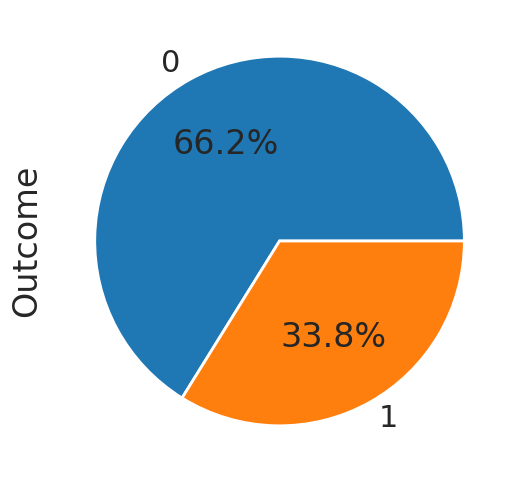

In [13]:
sns.set_style('darkgrid')
sns.set_context('poster')
plt.rcParams['figure.figsize'] = [8,6]
df.groupby('Outcome').size().plot(kind='pie',
                                       y = "Outcome",
                                       label = "Outcome",
                                       autopct='%1.1f%%')

Целевая колонка - есть диабет или нет - находится в добольно выраженном дисбалансе.У 66 % испытуемых не обнаружили диабет, а у 34% - обнаружили.
Данную колонку я оцениваю как качественный признак, остальные - как количественные.

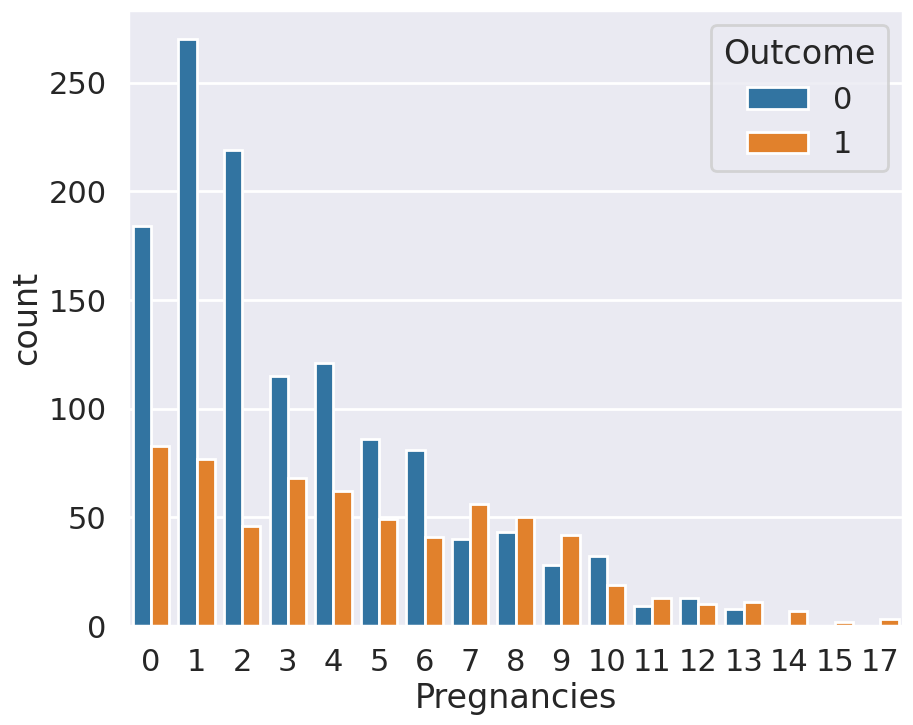

In [14]:
plt.figure(figsize=(10,8))
sns.countplot(x='Pregnancies',hue='Outcome',data=df)
plt.show()

Имеющиеся у нас данные не очень подходят для такой визуализации. Мы видим, что у женщин, у которых была 1 беременность, реже всего обнаруживали диабет. При этом чаще всего диабет обнаруживается у женщин (мы знаем, что в исследовании принимали участие только женщины), перенесших 0 или 1 беременность. Полагаю, чаще всего женщины и испытывают всего 0 или 1 беременность, их просто больше всего.

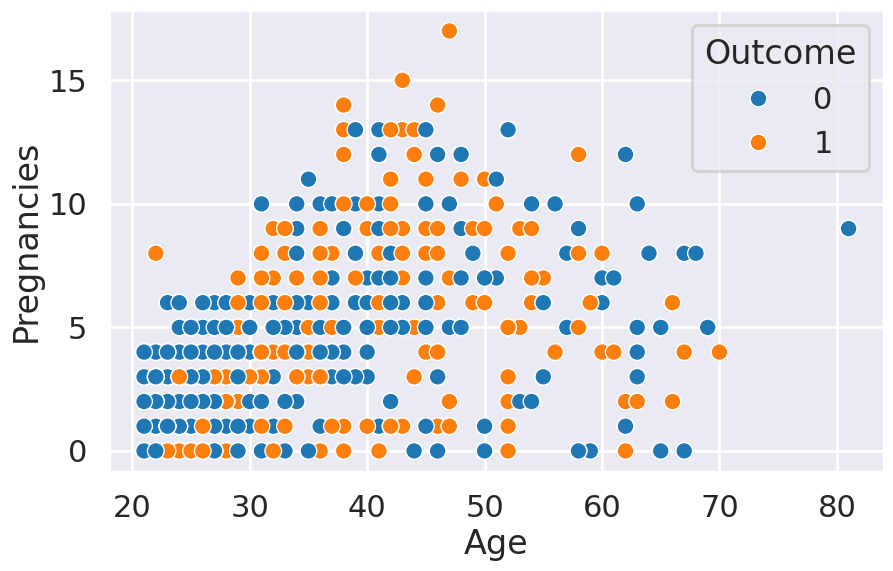

In [15]:
plt.figure(figsize=(10,6))
sns.scatterplot(data = df, x='Age', y = 'Pregnancies', hue='Outcome')
sns.set_palette("colorblind")
plt.show()

In [16]:
from scipy.stats import spearmanr
coef, p = spearmanr(df['Pregnancies'], df['Age'])
print(f"Коэффициент корреляции Спирмена между кол-вом беременностей и возрастом: {coef}, P-value: {p}")

Коэффициент корреляции Спирмена между кол-вом беременностей и возрастом: 0.6068347308907017, P-value: 2.488067131874704e-190


Результат анализа говорит о том, что существует статистически значимая положительная корреляция между количеством беременностей и возрастом женщины в данном наборе данных. Это вполне логично с медицинской точки зрения, так как женщины чаще рожают в определенном возрастном диапазоне.

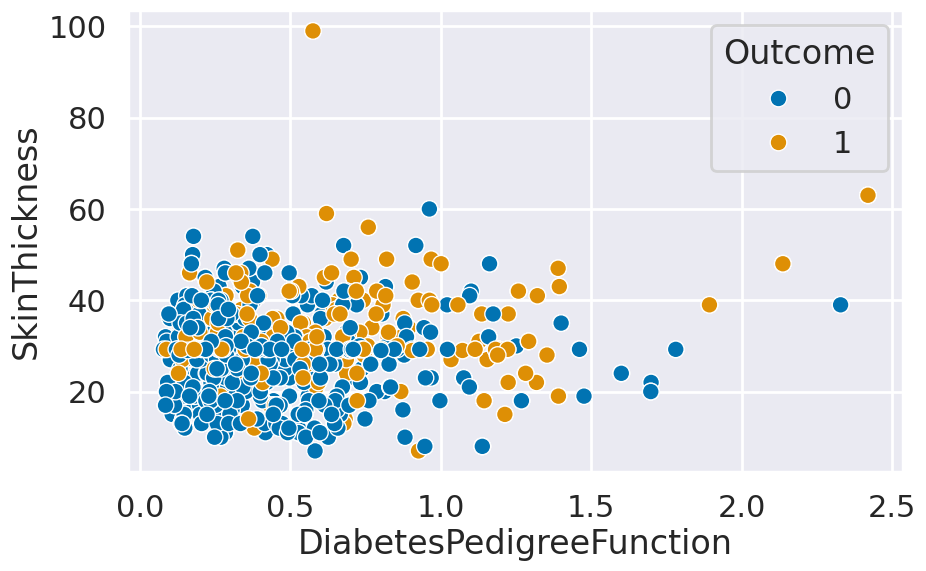

In [17]:
plt.figure(figsize=(10,6))
sns.scatterplot(data = df, x='DiabetesPedigreeFunction', y = 'SkinThickness', hue='Outcome')
plt.show()
# не очень понятно как  одно с другим может быть связано

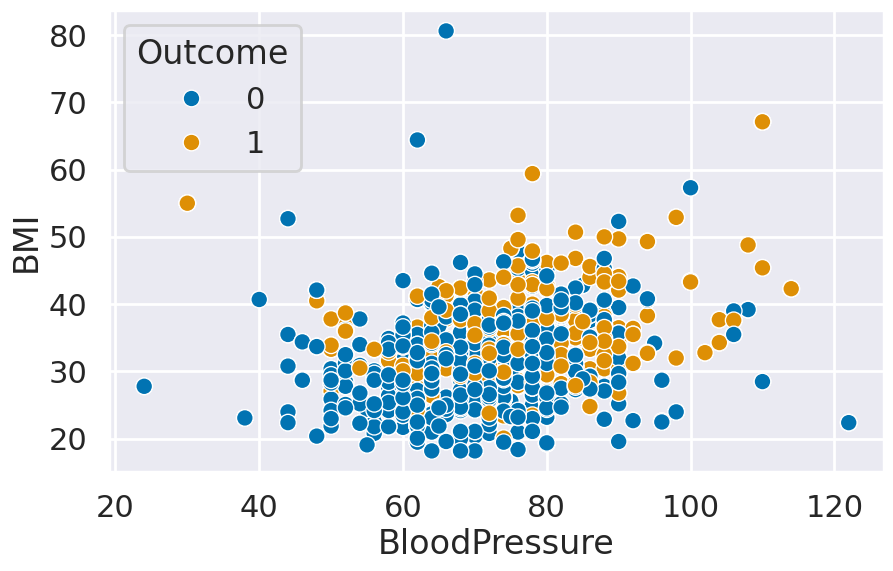

In [18]:
plt.figure(figsize=(10,6))
sns.scatterplot(data = df, x='BloodPressure', y = 'BMI', hue='Outcome')
plt.show()

 Здесь мы видимвзаимосвязь между артериальным давлением (`BloodPressure`) и индексом массы тела (`BMI`), а также как эти показатели связаны с наличием диабета (`Outcome`).

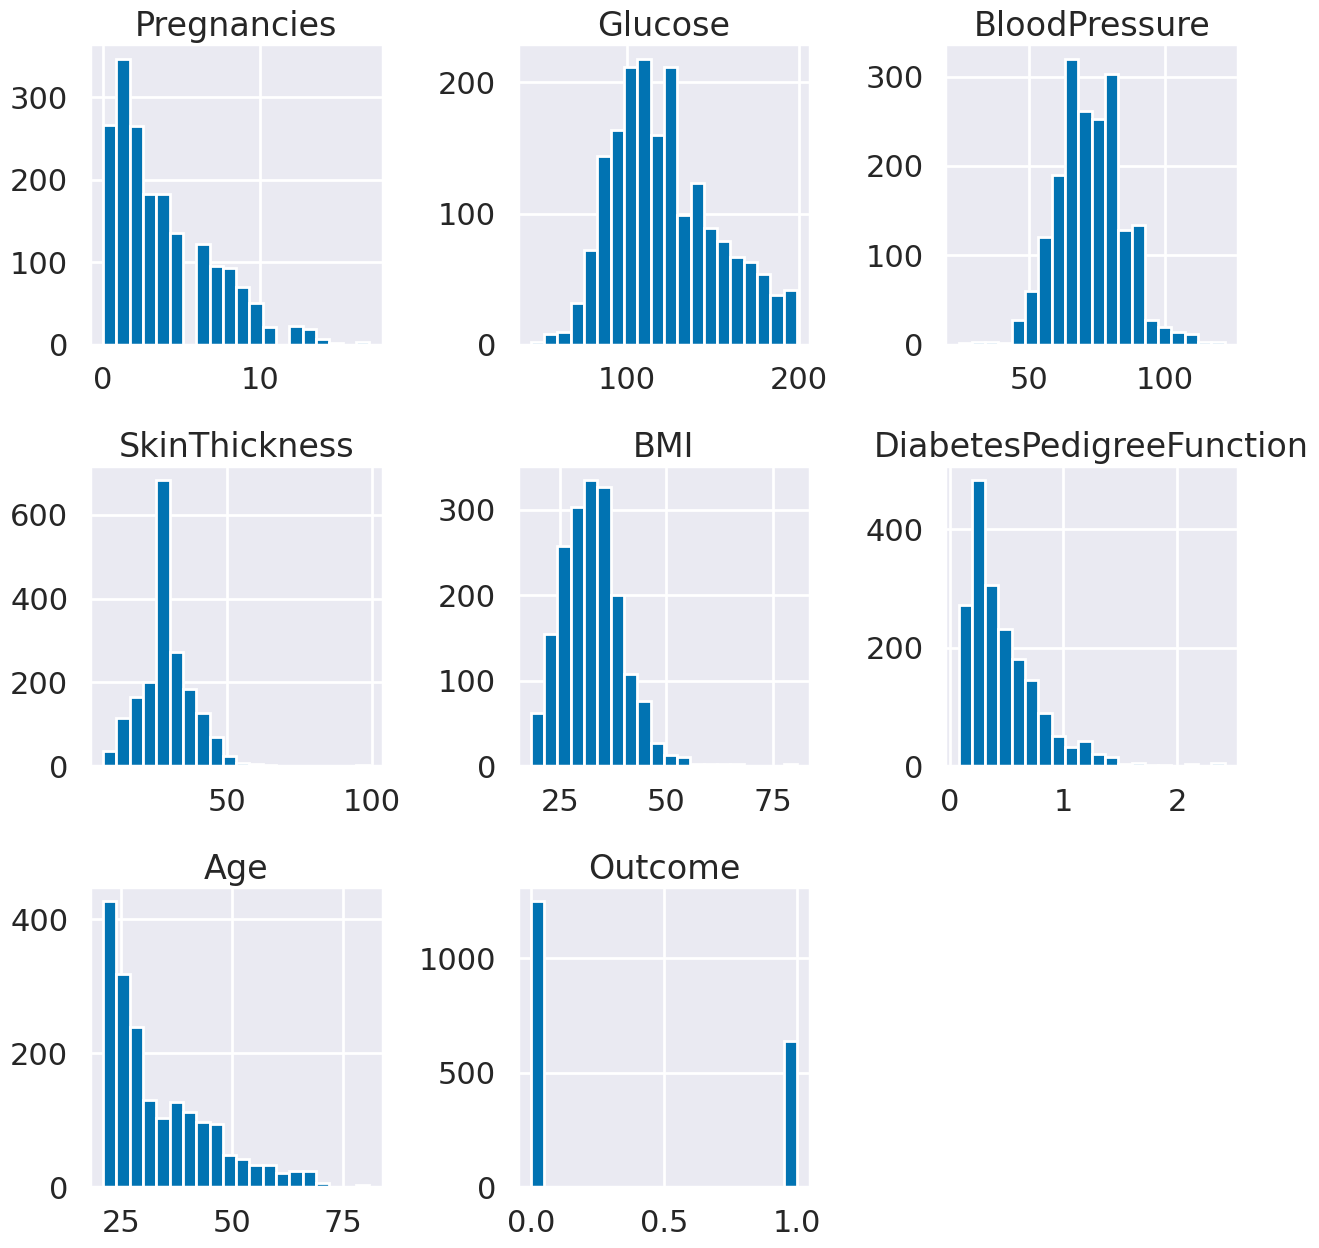

In [19]:
# Генерирует гистограммы для всех числовых столбцов в DataFrame
df.hist(figsize=(13, 13), bins=20)
plt.tight_layout() # Улучшает размещение подграфиков чтобы они не пересекались
plt.show()

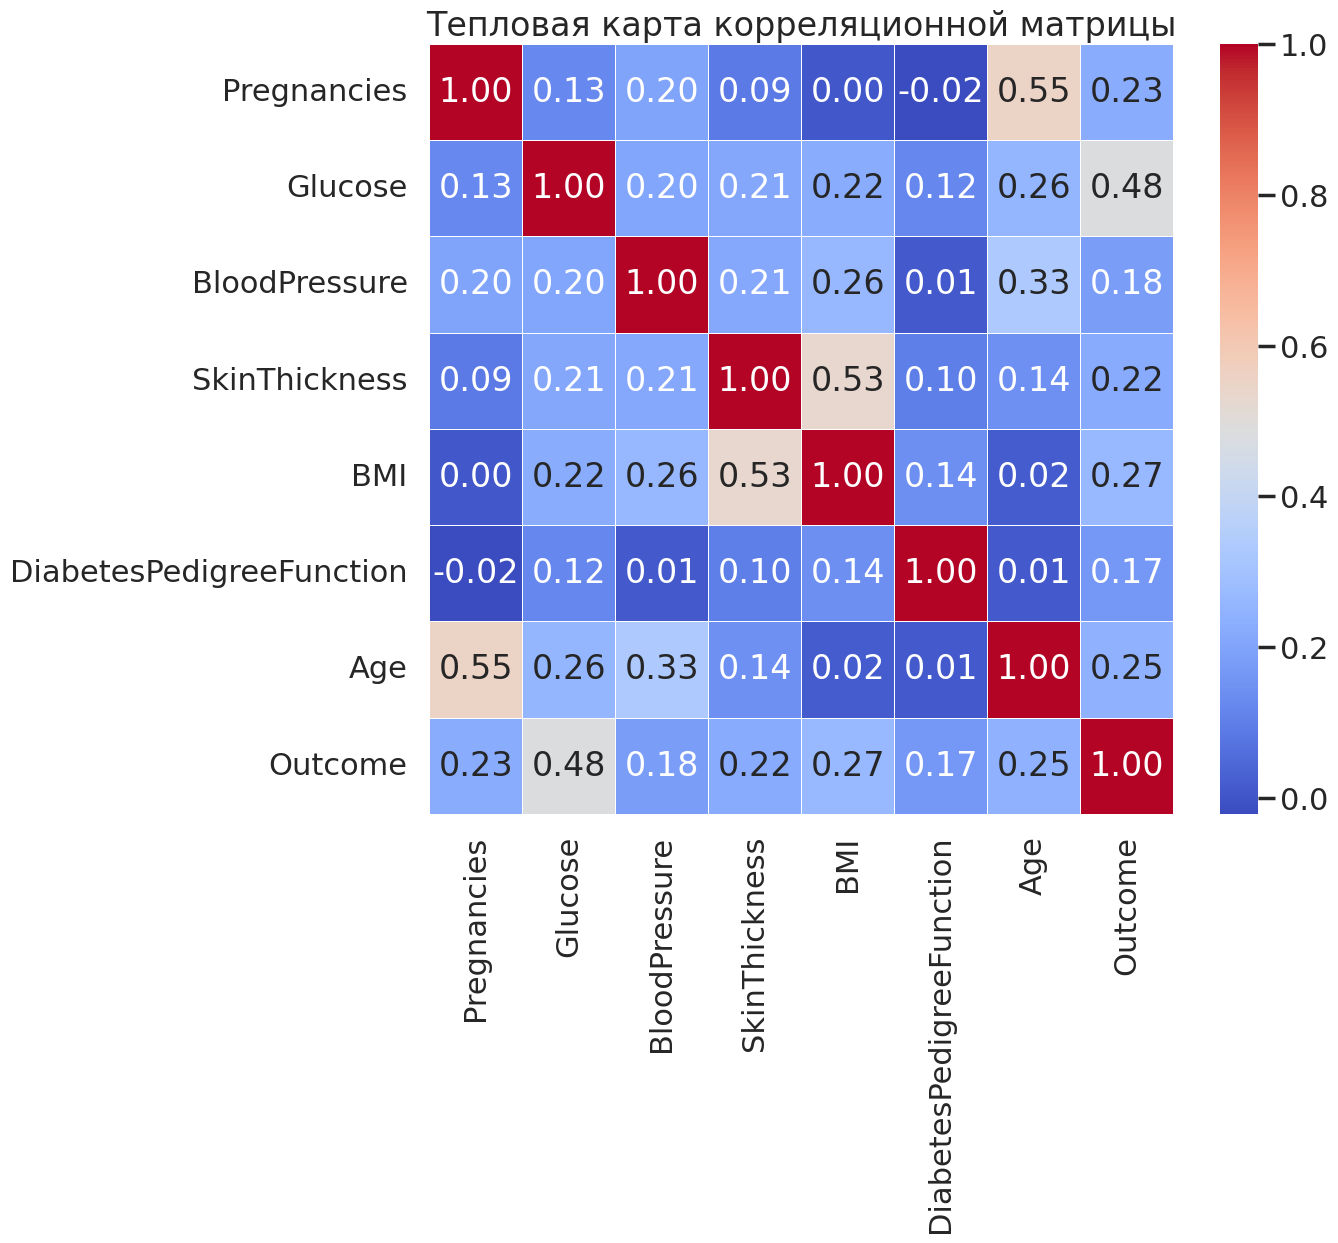

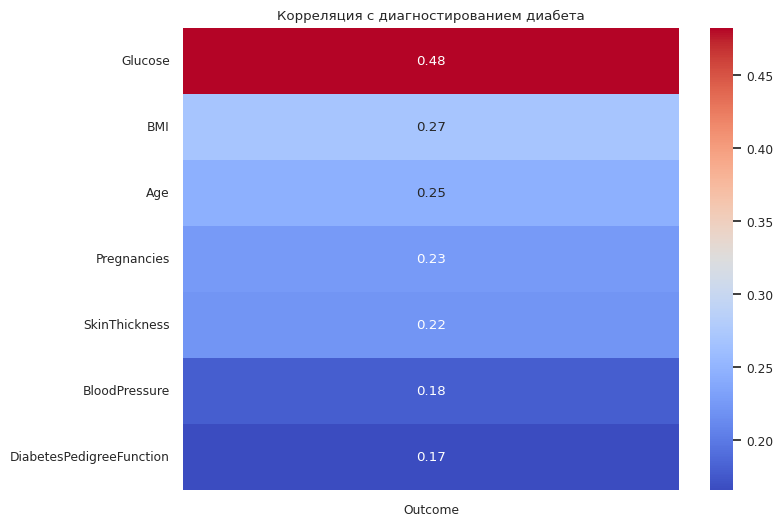

In [20]:
correlation_matrix = df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title("Тепловая карта корреляционной матрицы")
plt.show()

corr = df.corr()
target_corr = corr['Outcome'].drop('Outcome')

target_corr_sorted = target_corr.sort_values(ascending=False)

sns.set(font_scale=0.8)
sns.set_style("white")
sns.set_palette("PuBuGn_d")
sns.heatmap(target_corr_sorted.to_frame(), cmap="coolwarm", annot=True, fmt='.2f')
plt.title('Корреляция с диагностированием диабета')
plt.show()

Из графиков видно, что на проявление диабета больше всего влияют такие параметры как: уровень глюкозы (по которому в большой степени и выставляется диагноз), ИМТ, возраст.  
Как мы видим на тепловой карте, кол-во беременностей зависит скорее от возраста, чем от чего-либо еще, поэтому занимает высокое место. Также толщина кожной складки скорее связана с ИМТ, тк является еще одним маркером при постановке диагноза "ожирение". Возможно, имеет смысл данные параметры не включать в модель, так как они дублируют друг друга по своей сути. На графике мы видели, что в целом как таковое то же количество беременностей ни о чем не говорит.

2. Построение модели:  
— Используя алгоритм логистической регрессии, постройте модель бинарной классификации для предсказания наличия диабета у пациентов.  
— Обучите модель на обучающем наборе данных.  

In [21]:
from sklearn.metrics import accuracy_score

In [23]:
X = df[['BMI', 'Glucose']]  # Выбираем признаки
y = df['Outcome']  # Целевая переменная

X_train, X_test1, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#Разделяет данные на обучающую (80%) и тестовую (20%) выборки.
#`random_state=42` гарантирует, что разделение будет одинаковым во всех экспериментах, обеспечивая воспроизводимость результатов.

In [24]:
model1 = LogisticRegression(class_weight='balanced')
#Создает модель логистической регрессии. `class_weight='balanced'` — важный параметр, который учитывает дисбаланс классов (если один класс представлен значительно большим количеством примеров, чем другой).
# Это помогает избежать ситуации, когда модель хорошо предсказывает только преобладающий класс.
model1.fit(X_train, y_train) #Обучает модель на обучающих данных.
predictions = model1.predict(X_test1) # Делает предсказания на тестовых данных.
accuracy1 = accuracy_score(y_test, predictions) # Вычисляет точность модели, сравнивая предсказания с истинными значениями на тестовой выборке.
print("Accuracy:", accuracy1) # Выводит точность на экран.

Accuracy: 0.7142857142857143


In [25]:
X = df[['BMI', 'Glucose', 'Age']]
y = df['Outcome']

X_train, X_test2, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
model2 = LogisticRegression(class_weight='balanced')
model2.fit(X_train, y_train)

predictions = model2.predict(X_test2)
accuracy2 = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy2)

Accuracy: 0.7301587301587301


In [27]:
X = df[['BMI', 'Glucose', 'Age', 'BloodPressure']]
y = df['Outcome']

X_train, X_test3, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
model3 = LogisticRegression(class_weight='balanced')
model3.fit(X_train, y_train)

predictions = model3.predict(X_test3)
accuracy3 = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy3)

Accuracy: 0.7301587301587301


In [29]:
X = df[['BMI', 'Glucose', 'Age', 'BloodPressure', 'SkinThickness', 'Pregnancies']]
y = df['Outcome']

X_train, X_test4, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
model4 = LogisticRegression(class_weight='balanced')
model4.fit(X_train, y_train)

predictions = model4.predict(X_test4)
accuracy4 = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy4)

Accuracy: 0.7380952380952381


Сначала с каждым добавленным параметром точность нашей модели росла, однако параметры 'BMI', 'Glucose', 'Age' кажутся ключевыми, добавление давления, толщины кожной складки и кол-ва беременностей не существенно улучшают точность. Я подозреваю, что на самом деле толщина кожной складки и беременности даже скорее портят нашу модель.

In [31]:
X = df.drop(["Outcome", "Pregnancies", 'SkinThickness'], axis=1)
y = df["Outcome"]
X_train, X_test5, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
model5 = LogisticRegression(class_weight='balanced')
model5.fit(X_train, y_train)

predictions = model5.predict(X_test5)
accuracy5 = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy5)

Accuracy: 0.7592592592592593


И действительно, без этих признаков, но с неким коэффициентом отображающим семейный анамнез модель стала более точной.

3. Оценка модели:  
— Вычислите и проанализируйте метрики точности (accuracy), точности (precision), полноты (recall) и F1-меру для обученной модели на тестовых данных.

In [41]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
#Здесь создаются два словаря:

# models: Словарь, в котором ключами являются имена моделей, а значениями — сами модели (например, model1, model2 и т.д.).

models = {
    'Model 1': model1,
    'Model 2': model2,
    'Model 3': model3,
    'Model 4': model4,
    'Model 5': model5
}
# test_datasets: Словарь, где ключами являются имена моделей, а значениями — соответствующие тестовые наборы данных
#  (например, X_test1, X_test2 и т.д.).
test_datasets = {
    'Model 1': X_test1,
    'Model 2': X_test2,
    'Model 3': X_test3,
    'Model 4': X_test4,
    'Model 5': X_test5
}

results = []

# В этом цикле происходит следующее:
# Итерация по моделям: Для каждой модели из словаря models извлекается имя модели и сама модель.
# Получение тестового набора: На основе имени модели извлекается соответствующий тестовый набор данных из словаря test_datasets.
# Предсказание: Модель делает предсказания на тестовом наборе данных с помощью метода predict().
# Вычисление метрик: Для полученных предсказаний (y_pred) вычисляются метрики
# качества (точность, точность, полнота и F1) на основе истинных значений (y_test).
# Сохранение результатов: Результаты каждой модели (в виде списка метрик) добавляются в общий список results.
for model_name, model in models.items():
    X_test = test_datasets[model_name]
    y_pred = model.predict(X_test)
    scores = [
        accuracy_score(y_test, y_pred),
        precision_score(y_test, y_pred, average='binary'),
        recall_score(y_test, y_pred, average='binary'),
        f1_score(y_test, y_pred, average='binary')
    ]
    results.append(scores)

# Создаем DataFrame для результатов
results_df = pd.DataFrame(results, columns=['Accuracy', 'Precision', 'Recall', 'F1'], index=models.keys())

In [44]:
results_df

,Accuracy,Precision,Recall,F1
Model 1,0.714286,0.577236,0.559055,0.568000
Model 2,0.730159,0.598425,0.598425,0.598425
Model 3,0.730159,0.598425,0.598425,0.598425
Model 4,0.738095,0.600000,0.661417,0.629213
Model 5,0.759259,0.634328,0.669291,0.651341


### Метрики

1. **Accuracy (Точность)**: Это доля правильно классифицированных примеров от общего числа примеров.
   - **Model 5** имеет наивысшую точность (0.759), что означает, что примерно 75.9% предсказаний модели были правильными. Это лучший результат среди всех моделей.
   - **Model 1** имеет наименьшую точность (0.714), что указывает на то, что около 71.4% предсказаний были правильными.

2. **Precision (Точность)**: Это доля истинных положительных результатов среди всех предсказанных положительных.
   - **Model 5** также имеет наивысшую точность (0.634), что говорит о том, что среди всех предсказанных положительных случаев 63.4% действительно являются положительными.
   - **Model 1** имеет наименьшую точность (0.577), что указывает на то, что 57.7% предсказанных положительных случаев были правильными.

3. **Recall (Полнота)**: Это доля истинных положительных результатов среди всех фактических положительных.
   - **Model 5** имеет наивысший уровень полноты (0.669), что означает, что 66.9% всех фактических положительных случаев были правильно предсказаны.
   - **Model 1** имеет наименьшую полноту (0.559), что указывает на то, что только 55.9% фактических положительных случаев были предсказаны правильно.

4. **F1 Score**: Это гармоническое среднее между точностью и полнотой, которое учитывает как ложные положительные, так и ложные отрицательные.
   - **Model 5** имеет наивысший F1 Score (0.651), что говорит о том, что эта модель лучше всего сбалансировала точность и полноту.
   - **Model 1** имеет наименьший F1 Score (0.568), что указывает на менее сбалансированную производительность.

### Общий анализ

- **Model 5**: Эта модель демонстрирует наилучшие результаты по всем метрикам, что делает ее наиболее предпочтительной для данного набора данных. Она не только имеет высокую точность, но и показывает хорошее сочетание точности и полноты.
  
- **Model 4**: Хотя она имеет несколько более низкие результаты, чем Model 5, она все еще демонстрирует приемлемую производительность, особенно в полноте (0.661).

- **Model 1**: Эта модель показывает наименьшие результаты по всем метрикам, что может указывать на то, что она менее эффективна в классификации по сравнению с другими моделями.

- **Model 2 и Model 3**: Эти модели имеют одинаковые результаты, что может указывать на то, что они используют схожие алгоритмы или настройки.

### Заключение

Результаты показывают, что **Model 5** является наилучшей моделью для данного набора данных, в то время как **Model 1** следует рассмотреть для улучшения или замены, поскольку она показывает наименьшую производительность

In [43]:
from sklearn.metrics import classification_report
print(classification_report(y_test, model5.predict(X_test5)))

              precision    recall  f1-score   support

           0       0.83      0.80      0.82       251
           1       0.63      0.67      0.65       127

    accuracy                           0.76       378
   macro avg       0.73      0.74      0.73       378
weighted avg       0.76      0.76      0.76       378




### Интерпретация

1. **Precision (Точность)**:
   - **Класс 0**: 0.83 (83%) — Это означает, что среди всех примеров, предсказанных как класс 0, 83% действительно являются классом 0. Высокая точность указывает на то, что модель делает мало ложных положительных предсказаний для этого класса.
   - **Класс 1**: 0.63 (63%) — Это означает, что среди всех примеров, предсказанных как класс 1, только 63% действительно являются классом 1. Это указывает на то, что модель делает больше ложных положительных предсказаний для этого класса.

2. **Recall (Полнота)**:
   - **Класс 0**: 0.80 (80%) — Это означает, что модель правильно классифицировала 80% всех фактических примеров класса 0. Это говорит о том, что модель хорошо справляется с выявлением этого класса.
   - **Класс 1**: 0.67 (67%) — Это означает, что модель правильно классифицировала 67% всех фактических примеров класса 1. Это также указывает на то, что модель может пропускать некоторые примеры этого класса (ложные отрицательные).

3. **F1 Score**:
   - **Класс 0**: 0.82 — Это значение F1 Score для класса 0, которое является гармоническим средним между точностью и полнотой. Высокое значение говорит о том, что модель хорошо сбалансировала точность и полноту для этого класса.
   - **Класс 1**: 0.65 — Это значение F1 Score для класса 1, которое говорит о том, что модель менее сбалансирована в отношении точности и полноты для этого класса.

4. **Support**:
   - **Класс 0**: 251 — Это количество истинных примеров класса 0 в тестовом наборе.
   - **Класс 1**: 127 — Это количество истинных примеров класса 1 в тестовом наборе. Мы видим, что класс 0 более распространен, чем класс 1.

5. **Accuracy (Точность модели)**:
   - 0.76 (76%) — Это общая точность модели, которая показывает, что 76% всех предсказаний были правильными. Это достаточно хороший результат, но стоит учитывать, что точность может быть обманчива в случае несбалансированных классов.

6. **Macro Average**:
   - **Macro avg**: 0.73 (precision), 0.74 (recall), 0.73 (f1-score) — Эти значения представляют собой средние значения по всем классам, вычисленные без учета их поддержки. Это позволяет увидеть, как модель работает в целом, не учитывая количество примеров каждого класса.

7. **Weighted Average**:
   - **Weighted avg**: 0.76 (precision), 0.76 (recall), 0.76 (f1-score) — Эти значения учитывают количество примеров каждого класса. Это полезно для оценки производительности модели в условиях несбалансированных классов, как в вашем случае.

### Заключение

- Модель хорошо справляется с классификацией класса 0, но имеет некоторые трудности с классом 1, что может указывать на необходимость улучшения модели для лучшего распознавания этого класса.
- Возможно, стоит рассмотреть методы балансировки классов или улучшение модели, чтобы повысить точность и полноту для класса 1.
- Общая точность модели (76%) является хорошим начальным результатом, но всегда есть возможности для улучшения.